###  13.4.2 irisデータで実装

今回は､**<font color='red'>おなじみirisデータをクラスタリングで分類してみましょう</font>**｡ストーリーとしては､**｢<font color='red'>未知である新種のアヤメの花を発見する</font>ために､無作為に摘んだ150個のサンプルの形状データを調査する｣**という状況を想定しましょう｡

そのため､今回は**setosa**や**versicolor**､あるいは**versinicaといった品種は未知**であり､さらに言えば**<font color='red'>サンプルの中にいくつの品種が混ざっているかもわからない</font>**とします｡つまり､**<font color='red'>k-meansを現実の状況で使う場面と同じように､クラスタの数 $k$ が未知である</font>**ということです｡

In [20]:
#写経【1】
# irisデータのロード
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
#データとラベルに分ける

X = iris.data
y = iris.target # クラスラベルは今回は未知とする

In [21]:
#写経【２】
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.fit_transform(X)

In [22]:
#写経【３】
# 主成分分析の実行
#PCAのクラスを読み込む
from sklearn.decomposition import PCA
#PCAのインスタンスを生成
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)

#### k-means法の実行

さて､ここからいよいよ**k-means法**の実行に移ります｡ **$k$ の数を変えたりしながら､試していきましょう**｡

In [23]:
#写経【４】
# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,  # クラスタの個数を指定
            init='random',           # セントロイドの初期値の決め方を決定
            n_init=10,                # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,         # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0,     # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_pca[:, 0:2])

In [ ]:
#写経【５】
# クラスタリングの結果を出力
import matplotlib.pyplot as plt
% matplotlib inline

In [24]:
# クラスタリングの結果をプロットする関数
# (クラスタの数, 学習器, 学習データ)
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    # 5クラスまでプロットできる
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

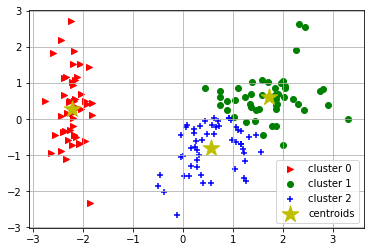

In [25]:
#写経【６】
# プロットを実行
kmeans_plot(3, km, X_pca[:, 0:2])

#### おまけ: 精度の確認

さて､これで**クラスタリング**は完了しました｡**見た感じだと､3品種のクラスタは正解のものにかなり近いのではないか**という印象を受けます｡実際のケースでは､**この結果から品種分類にあたりをつけて､詳細な調査をしていく**という流れになりますが､**今回は本来手に入っていないはずの教師データが手元にある**ので､**クラスタリングでの正答率を求めてみます**｡

In [26]:
#写経【７】
# y_kmを確認
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [9]:
#写経【８】
# 正解ラベルを作る
# プロットを見ると､このときはversicolorとversinicaのlabelが逆になっている
# 両者のラベルを入れ替えて､正解ラベルをつくる
y_correct = np.hstack((y[0:50], y[100:150]))
y_correct = np.hstack((y_correct, y[50:100]))
y_correct

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
# 正答数を累積
correct_ans = 0
for i in range(len(y_correct)):
    if y_km[i] == y_correct[i]:
        correct_ans += 1

# 正答率を出力
correct_ans / len(y)

0.8333333333333334

## 13.5 k-means法の弱点と対策

### 13.5.1 弱点1. 超球状でないクラスタや､サンプル数の異なるクラスタの検出が苦手

#### 例1）超球状でないクラスタを検出できない例
では､説明した内容が本当かどうか､**適当なサンプルデータを作成して確認**してみましょう｡まずは､**<font color='red'>クラスタが超球状でない場合</font>**です｡**細長い形状**をしたクラスタを適切に検出できるかどうかを確認します｡

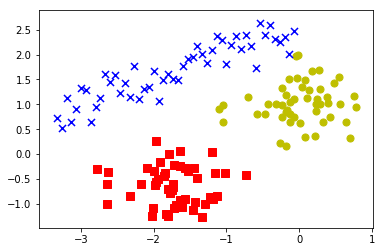

In [33]:
# 超球上でないクラスタを作成

# サンプル数50の超球状のクラスタを生成
from sklearn.datasets import make_blobs
X_1, _ = make_blobs(n_samples=50,
                 n_features=2,
                 centers=1,
                 cluster_std=0.4,
                 center_box=[0, -2],
                 random_state=6
                )

# サンプル数50の超球状のクラスタを生成
X_2, _ = make_blobs(n_samples=50,
                 n_features=2,
                 centers=1,
                 cluster_std=0.4,
                 center_box=[0, 2],
                 random_state=9
                )

# サンプル数50の細長いクラスタを生成
from numpy.random import *
seed(2)
X_31 = np.array([i/15 for i in range(-50, 0)])
X_32 = np.array([0.5*float(i) + 2 + float(randint(100))/100 for i in X_31])
X_3 = np.hstack((X_31.reshape(-1, 1), X_32.reshape(-1, 1)))

# 2種類のクラスタを色分けして表示
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', marker='s', s=50)
plt.scatter(X_2[:, 0], X_2[:, 1], c='y', marker='o', s=50)
plt.scatter(X_3[:, 0], X_3[:, 1], c='b', marker='x', s=50)
plt.show()

このデータを**k-means法**にかけてみましょう｡**縦長のクラスタ**を検出できるのでしょうか？

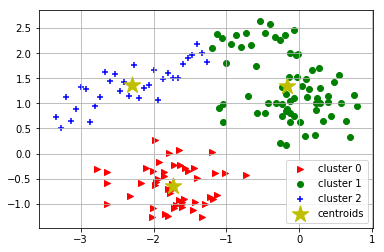

In [34]:
#写経【９】
# 生成したクラスタのデータを統合
X = np.vstack((X_1, X_2))
X = np.vstack((X, X_3))

# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いた実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X)

# プロットを実行
kmeans_plot(3, km, X)

**<font color='red'>縦長のクラスタが超球状に近づくように､緑のクラスタが食い込んでしまっている</font>**のがわかるかと思います｡

#### 例2）クラスタ内のサンプル数が大きく異なる場合
では､次に**<font color='red'>クラスタ内のサンプル数が大きく異なる場合</font>**について確認してみましょう｡

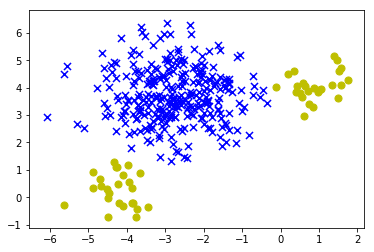

In [35]:
# サンプル数が大きく異なるクラスタを生成
from sklearn.datasets import make_blobs

# サンプル数25のクラスタを2つ生成
X_1, _ = make_blobs(n_samples=50,
                 n_features=2,
                 centers=2,
                 cluster_std=0.5,
                 random_state=3
                )

# サンプル数300のクラスタを1つ生成
X_2, _ = make_blobs(n_samples=300,
                 n_features=2,
                 centers=1,
                 cluster_std=1.0,
                 center_box=(-5, 5),
                 random_state=5
                )

# 2種類のクラスタを色分けして表示
plt.scatter(X_1[:, 0], X_1[:, 1], c='y', marker='o', s=50)
plt.scatter(X_2[:, 0], X_2[:, 1], c='b', marker='x', s=50)
plt.show()

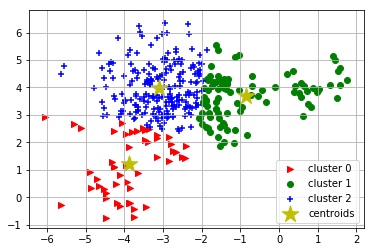

In [36]:
#写経【1０】
# 生成したクラスタのデータを統合
X_blobs = np.vstack((X_1, X_2))

# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いた実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_blobs)

# プロットを実行
kmeans_plot(3, km, X_blobs)

プロットの結果を見ると､予想通り**<font color='red'>大きなクラスタに小さなクラスタが食い込んで､クラスタ内のサンプル数を等しくさせるような力が加わっているのがわかります</font>**｡このように､**<font color='red'>k-means法はサンプル数が大きく違うようなクラスタも正しく検出できません</font>**｡

#### 対策①: エルボー法
そこで役に立つのが､**エルボー法**です｡エルボー法とは､**<font color='red'>k-means法を $k$ を変えて繰り返し行い､ $SSE$ が｢がくっ｣と低下するような $k$ を見つけて目安とする方法</font>**です｡**グラフが決まって人の肘のような形になる**ことから､**エルボー法**と名付けられています｡


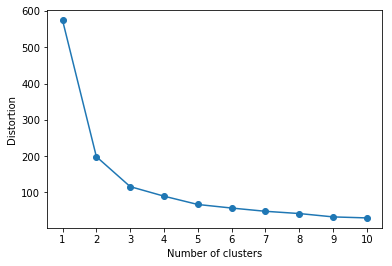

In [46]:
#写経【1１】
# エルボー法による､適切なkの値の確認

# 各kで算出されたSSEを格納するリストを定義
distortions = []

# kを変えながらk-means法を実行
for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_pca[:, 0:2])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**エルボー法**は､**<font color='red'>｢ $k$ が小さすぎると､複数のクラスタを無理に統合することになるので､ $SSE$ が急に上がるだろう｣</font>**という仮定に基づいています｡この**｢がくっと｣**というところが重要です｡なぜなら､ **<font color='red'>$k$ が増えれば増えるほどセントロイドが多く存在することになり､近くのセントロイドを見つけるのが容易になって $SSE$ が小さくなりやすくなるという､一般的な傾向があるからです</font>**｡**今回のケースで言えば､それらしい $k$ の値は2または3といったところでしょうか**｡

#### 対策②: シルエット分析

もうひとつの対策が**シルエット分析**です｡ここでは**<font color='red'>シルエット係数（silhouette coefficient）</font>**なるものを計算して､**クラスタリングの質**を判定します｡**クラスタリングの質**は何で決まるかというと､**<font color='red'>｢似たものを似たもの扱いできていること（内部結合）｣</font>**と､**<font color='red'>｢似てないものを似てないもの扱いできていること（外部分離）｣</font>**の2つです｡**シルエット係数**は**これらがどれだけ際立っているかを表す指標**になっています｡

In [47]:
#写経【1２】
# k-means法を実行
# 3クラスタに分ける
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いた実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_pca[:, 0:2])

In [48]:
from sklearn.metrics import silhouette_samples

# 全サンプルのシルエット係数を計算
# (X, y_km, 利用する距離の種類)
# 'euclidiean' はユークリッド距離
s = silhouette_samples(X_pca[:, 0:2], y_km, metric='euclidean')

In [49]:
# シルエット係数を確認
s

array([ 0.7437586 ,  0.58954614,  0.69409517,  0.64122155,  0.73369006,
        0.61141915,  0.73511038,  0.74362968,  0.50135509,  0.65881326,
        0.68571458,  0.74237058,  0.59842831,  0.56327201,  0.56628677,
        0.4531917 ,  0.62528033,  0.73935287,  0.59722791,  0.68463541,
        0.69664134,  0.70278381,  0.71659332,  0.65310985,  0.73907159,
        0.56794047,  0.72282242,  0.735419  ,  0.73779078,  0.68998794,
        0.64387074,  0.67403197,  0.59277666,  0.53806428,  0.65881326,
        0.70266667,  0.70991422,  0.65881326,  0.57082221,  0.74027388,
        0.74561258,  0.07387569,  0.66820107,  0.70668142,  0.66918434,
        0.57672248,  0.68618886,  0.68751404,  0.69636903,  0.72662061,
        0.46212585,  0.21972257,  0.48205205,  0.56842335,  0.18797752,
        0.58705332,  0.29071226,  0.4273799 ,  0.07138504,  0.61145173,
        0.43386335,  0.37349002,  0.55612643,  0.37048656,  0.5300063 ,
        0.26246967,  0.45841515,  0.61241816,  0.45906888,  0.61

In [50]:
#写経【1３】
# サンプル数と同じ150個のシルエット係数が算出されていることを確認
len(s)

150

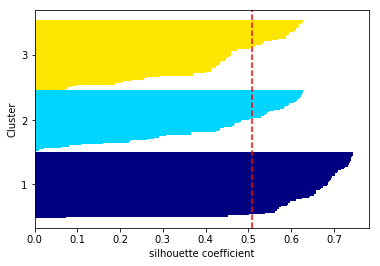

In [51]:
# シルエット図を出力
from matplotlib import cm

# シルエット図を出力する関数を定義
def draw_silhouettes(X, y_km):
    cluster_labels = np.unique(y_km)                     # クラスラベルを重複なく抽出
    n_clusters = cluster_labels.shape[0]                 # クラスタの数を算出

    # シルエット係数を計算
    # (X, y_km, 距離の種類)
    s = silhouette_samples(X, y_km, metric='euclidean')

    # 各ラベルごとにシルエット図を描画
    y_ax_lower, y_ax_upper= 0, 0                         # シルエット図の上端と下端の初期値を設定
    yticks = []                                          # 縦軸のメモリ位置を格納するリストを生成
    for i, label in enumerate(cluster_labels):
            label_s = s[y_km==label]                     # 該当するクラスタについて､シルエット係数を算出
            label_s.sort()                               # シルエット係数を小さい順に並べ替える
            y_ax_upper += len(label_s)                   # シルエット図の上端を､サンプルの数だけ引き上げる
            color = cm.jet(float(i) / n_clusters)        # color mapから色を取得
            plt.barh(range(y_ax_lower, y_ax_upper),      # 横軸の範囲を指定
                             label_s,                    # バーの幅を指定
                             height=1.0,                 # バーの厚みを指
                             color=color)                # バーの色を指定
            yticks.append((y_ax_lower + y_ax_upper) / 2) # クラスタラベルの表示位置を追加
            y_ax_lower += len(label_s)                   # シルエット図の下端を､サンプルの数だけ引き上げる

            
    plt.axvline(np.mean(s), color="red", linestyle="--") # 係数の平均値に破線を引く(横軸の値, 色, 線の形式)
    plt.yticks(yticks, cluster_labels + 1)               # クラスタレベルを表示(位置, 縦軸の値)
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    plt.show()

# シルエット図を出力
draw_silhouettes(X_pca[:, 0:2], y_km)

#### クラスタリングが適切でない場合のシルエット図

では､ $k$ の値を変えて､クラスタリングが適切でない場合のシルエット図を見ていきましょう｡まずは､ **<font color='red'>$k$ が小さすぎる場合</font>**です｡**シルエット係数の値自体は問題なさそう**ですが､**<font color='red'>サンプル数が大きく偏っている</font>**ことがわかります｡こういった場合は､**<font color='red'>k-meansが適切にクラスタリングできる状況に反している</font>**ので､ $k$ は不適切だと思われます｡

In [54]:
#写経【14】
# k-means法を実行
# 2クラスタに分ける
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いた実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_pca[:, 0:2])

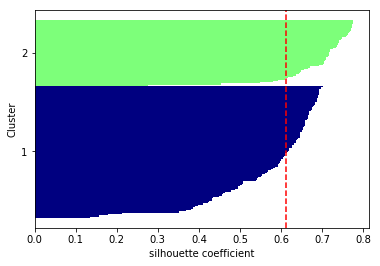

In [55]:
#写経【1５】
# シルエット図を描画
draw_silhouettes(X_pca[:, 0:2], y_km)

In [56]:
#写経【1６】
# k-means法を実行
# 4クラスタに分ける
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いた実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_pca[:, 0:2])

では､逆に**<font color='red'> $k$ が大きすぎる場合を見てみましょう</font>**｡この場合は､サンプル数が等しくならないことに加えて､**<font color='red'>シルエット係数がマイナスのものが出てきてしまっています</font>**｡**やはり､ $k$ の値が適切でないことがわかります**｡

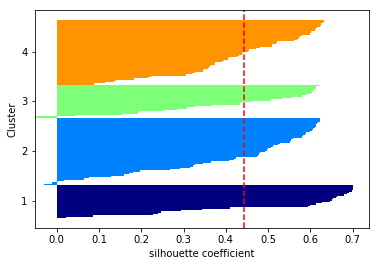

In [57]:
#写経【1７】
# シルエット図を描画
draw_silhouettes(X_pca[:, 0:2], y_km)

### 13.5.3 弱点3. セントロイドの初期値次第で､最終的なクラスタが大きく変わる

**k-means法**は**セントロイドの初期値を､ランダムに決定します**｡そのときに､**<font color='red'>初期値次第では､どう見ても無理のあるクラスタに収束してしまうことがあります</font>**｡このような､**初期値によって結果が変わってしまう性質を<font color='red'>｢初期値依存性｣</font>といいます**｡
![](https://ai-std-contents.azureedge.net/image/ml13_18.png)

**こうした収束を抑制するための対策**には､以下の2つがあります｡

**対策①: k-means法を繰り返し実行する**  
最も単純な方法は､**<font color='red'>k-means法を何回か繰り返し実行して､$SSE$ が一番小さくなった学習器を採用することです</font>**｡そうすることで､**<font color='red'>無理のある学習器を採用してしまう確率を減らすことができます</font>**｡** ```KMeans()``` の引数である ```n_init``` の値を変えることで実行できます**｡

**対策②: k-means++法を利用する**  
次に考えられるのは､**<font color='red'>セントロイドの初期値のとり方を工夫する</font>**という方法です｡**k-means++法**はそうした工夫のひとつで､**<font color='red'>｢無理のある収束は､セントロイドの初期値が近いときに起こりやすい｣</font>**という傾向に注目して、**<font color='red'>離れたサンプル同士で初期値をとるようにしています</font>**｡実行するためには､KMeansの引数の ```init='random'``` のところを ```init='k-means++'``` とするだけで実行できます｡  

というよりも実は､**<font color='red'><code>init</code>のデフォルト値は<code>k-means++</code>になっているので､特に指定しなければk-means++法で初期値が設定されます</font>**｡